matplot_test.py

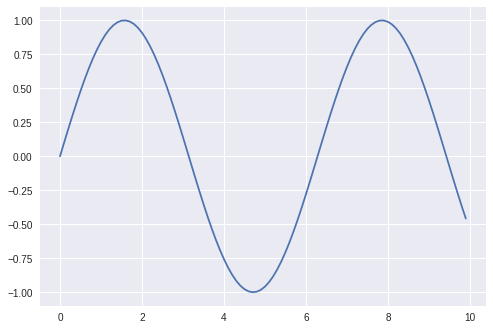

In [1]:
#matplotのテスト

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)

plt.plot(x, y)
plt.show()

Colaboratoryにmecabをインストール

In [2]:
!apt-get install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 0 not upgraded.
Need to get 28.9 MB of archives.
After this operation, 276 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 libmecab2 amd64 0.996-3.1 [256 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 libmecab-dev amd64 0.996-3.1 [307 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/universe amd64 mecab-utils amd64 0.996-3.1 [4,750 B]
Get:4 http://archive.ubuntu.com/ubuntu artful/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-3 [16.1 MB]
Get:5 http://archive.ubuntu.com/ubuntu artful/universe

In [3]:
!pip install mecab-python3

    100% |████████████████████████████████| 51kB 4.2MB/s 
  Running setup.py bdist_wheel for mecab-python3 ... - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/4c/07/3a/5f22ccc9f381f3bc01fa023202061cd1e0e9af855292f005dd
Successfully built mecab-python3


mecabの実行テスト

In [4]:
import MeCab

tagger = MeCab.Tagger()

result = tagger.parse("こんにちは、お元気ですか？")
print(result)

こんにちは	感動詞,*,*,*,*,*,こんにちは,コンニチハ,コンニチワ
、	記号,読点,*,*,*,*,、,、,、
お	接頭詞,名詞接続,*,*,*,*,お,オ,オ
元気	名詞,形容動詞語幹,*,*,*,*,元気,ゲンキ,ゲンキ
です	助動詞,*,*,*,特殊・デス,基本形,です,デス,デス
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
？	記号,一般,*,*,*,*,？,？,？
EOS



google drive をマウントするためのおまじない

やろうとおもったけどできなさそう・・・

吾輩は猫であるデータを持ってくる

が、これを起動したら、データファイルが全て壊れていることを発見。

というわけで、neko.txtを手動で動かしてくることにする

In [7]:
from google.colab import files
uploaded = files.upload()

Saving neko.mecab.txt to neko.mecab.txt


In [11]:
import MeCab
fname = "neko.txt"
fname_parsed = "neko.mecab.txt"

f = open(fname)

line = f.readline()

for i in range(10):
    line = f.readline()
    print (line)

f.close()

f = open(fname_parsed)

line = f.readline()

for i in range(10):
    line = f.readline()
    print (line)

f.close()




　吾輩は猫である。

名前はまだ無い。



　どこで生れたかとんと見当がつかぬ。

何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。

吾輩はここで始めて人間というものを見た。

しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。

この書生というのは時々我々を捕えて煮て食うという話である。

しかしその当時は何という考もなかったから別段恐しいとも思わなかった。

　	記号,空白,*,*,*,*,　,　,　

吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ

は	助詞,係助詞,*,*,*,*,は,ハ,ワ

猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ

で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ

ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル

。	記号,句点,*,*,*,*,。,。,。

名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ

は	助詞,係助詞,*,*,*,*,は,ハ,ワ

まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ



nlp36.py

In [13]:
#nlp36
#単語の出現頻度

import MeCab
from collections import Counter


def neco_lines():
    '''「吾輩は猫である」の形態素解析結果のジェネレータ
    「吾輩は猫である」の形態素解析結果を順次読み込んで、各形態素を
    ・表層形（surface）
    ・基本形（base）
    ・品詞（pos）
    ・品詞細分類1（pos1）
    の4つをキーとする辞書に格納し、1文ずつ、この辞書のリストとして返す
    戻り値：
    1文の各形態素を辞書化したリスト
    '''
    with open(fname_parsed) as file_parsed:

        morphemes = []
        for line in file_parsed:

            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                raise StopIteration     # 区切りがなければ終了
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface': cols[0],
                'base': res_cols[6],
                'pos': res_cols[0],
                'pos1': res_cols[1]
            }
            morphemes.append(morpheme)

            # 品詞細分類1が'句点'なら文の終わりと判定
            if res_cols[1] == '句点':
                yield morphemes
                morphemes = []


lines = neco_lines()
word_counter = Counter()
for line in lines:
    word_counter.update([mophera['surface'] for mophera in line])

list_word = word_counter.most_common()
print(list_word)

[('の', 9194), ('。', 7486), ('て', 6873), ('、', 6772), ('は', 6422), ('に', 6268), ('を', 6071), ('と', 5515), ('が', 5339), ('た', 3989), ('で', 3813), ('「', 3231), ('」', 3225), ('も', 2479), ('ない', 2391), ('だ', 2367), ('し', 2328), ('から', 2043), ('ある', 1730), ('な', 1612), ('ん', 1568), ('か', 1531), ('いる', 1251), ('事', 1207), ('へ', 1034), ('する', 998), ('う', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 697), ('ね', 683), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('そう', 554), ('一', 553), ('何', 539), ('なる', 531), ('さ', 513), ('よ', 509), ('なら', 483), ('吾輩', 481), ('い', 477), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('\u3000', 411), ('なっ', 404), ('それ', 395), ('来', 364), ('れ', 356), ('見', 350), ('でも', 345), ('時', 344), ('迷亭', 343), ('ませ', 330), ('いい', 320), ('——', 319), ('ところ', 315), ('まで', 313), ('方', 312), ('三', 311), ('二', 302), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272),

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: generator 'neco_lines' raised StopIteration


nlp37.py

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: generator 'neco_lines' raised StopIteration
  


('の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た')
(9194, 7486, 6873, 6772, 6422, 6268, 6071, 5515, 5339, 3989)


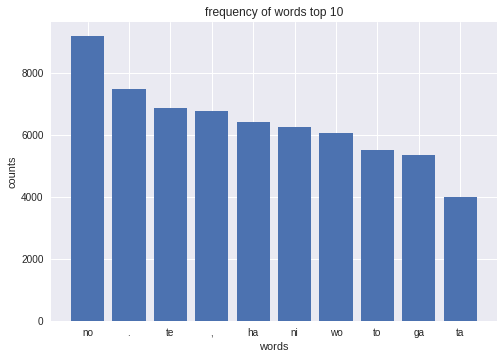

In [28]:
#nlp37
#頻度上位10語

import MeCab


lines = neco_lines()

word_counter = Counter()
for line in lines:
    word_counter.update([mophera['surface'] for mophera in line])

size = 10
list_word = word_counter.most_common(size)
#print(list_word)

list_zipped = list(zip(*list_word))
#[('の', 9194), ('。', 7486), ('て', 6873), ('、', 6772), ('は', 6422), ('に', 6268), ('を', 6071), ('と', 5515), ('が', 5339), ('た', 3989)]
#上記のデータをZipを使って下のようにする。
#[('の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た'), (9194, 7486, 6873, 6772, 6422, 6268, 6071, 5515, 5339, 3989)]
words = list_zipped[0]
counts = list_zipped[1]
#print(list_zipped)
print(words)
print(counts)

#日本語対応が難しそうだったのでwordsリストを英語版に勝手に変更して使う。
wordsEng = ['no', '.', 'te', ',', 'ha', 'ni', 'wo', 'to', 'ga', 'ta']


plt.bar(range(0, size), counts, align='center', tick_label=wordsEng)
#棒グラフで(x, y)の値を設定しておく

plt.title("frequency of words top 10")
plt.xlabel("words")
plt.ylabel("counts")


plt.grid(True)

plt.show()